In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston


In [4]:
boston = load_boston()

In [5]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Text(0,0.5,u'Number of houses')

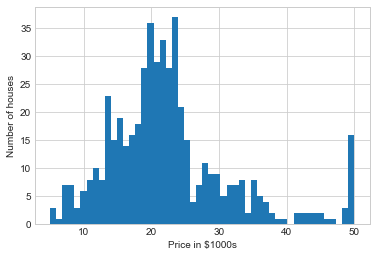

In [6]:
plt.hist(boston.target,bins=50)

plt.xlabel('Price in $1000s')
plt.ylabel('Number of houses')

Text(0,0.5,u'Price in $1000s')

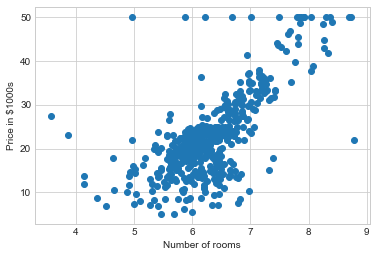

In [7]:
# plot the attribute at the 5 index, which is corresponding to room number here
plt.scatter(boston.data[:,5],boston.target)

#set x and y label
plt.xlabel('Number of rooms')
plt.ylabel('Price in $1000s')


In [9]:
#use pandas to transform the dataset to DataFrame
boston_df = DataFrame(boston.data)

#label columns
boston_df.columns = boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
# set target as Price and append to the DataFrame
boston_df['Price'] = boston.target

In [11]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


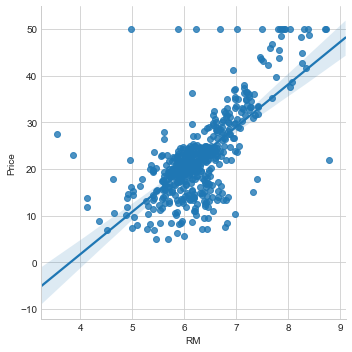

In [12]:
#use seaborn limplot to create a linear fit for room number and price
sns.lmplot('RM','Price',data=boston_df)

In [13]:
#use numpy for a univariate linear regression

#Set X as median room value 
X = boston_df.RM

In [24]:
# use v to make x two-dimensional
X = np.vstack(boston_df.RM)

In [25]:
X.shape

(506, 1)

In [26]:
#set up Y as the target price of the houses
Y = boston_df.Price

In [37]:
X = np.array([[value,1] for value in X])

In [38]:
X

array([[ 6.575,  1.   ],
       [ 6.421,  1.   ],
       [ 7.185,  1.   ],
       ..., 
       [ 6.976,  1.   ],
       [ 6.794,  1.   ],
       [ 6.03 ,  1.   ]])

In [39]:
#y=mx+b, get the m and b value for our best fit value
m, b = np.linalg.lstsq(X, Y)[0]

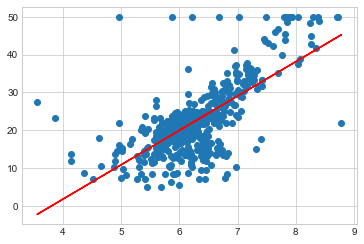

In [40]:
#plot it all together
# firt plot the original points, with RM as x and price as y
plt.plot(boston_df.RM,boston_df.Price,'o')

#put the best fit line
x = boston_df.RM
plt.plot(x,m*x + b,'r',label='Best Fit Line')



In [41]:
# find the error
#get the resulting array
result = np.linalg.lstsq(X,Y)

#get the total error
error_total = result[1]

#get the root mean square error
rmse = np.sqrt(error_total/len(X))

#print
print 'The root mean square error was %.2f' %rmse

The root mean square error was 6.60


In [46]:
#use scikit learn to implement a multivariate regression
#import sklearn for linear regression
import sklearn
from sklearn.linear_model import LinearRegression


In [47]:
#create a linear regression object
lreg = LinearRegression()

In [48]:
#data columns
X_multi = boston_df.drop('Price',1)
#targets
Y_target = boston_df.Price

In [49]:
#implement linear regression
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
print 'The estimated intercept coefficient is %.2f' %lreg.intercept_

print 'The number of coefficients used was %d' %len(lreg.coef_)

The estimated intercept coefficient is 36.49
The number of coefficients used was 13


In [51]:
#set a DataFrame from the features
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

#set a new column for the coefficient from the linear regression
coeff_df['Coefficient Estimate'] = Series(lreg.coef_)

In [52]:
coeff_df


,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [54]:
#using training and validation
#set the train and test data set
X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(X,boston_df.Price)

In [56]:
#print the shape of the test and training dataset
print X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(379, 2) (127, 2) (379,) (127,)


In [57]:
#create a linear regression object
lreg = LinearRegression()

# do linear regression on traning dataset
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
#prediction on traning dataset
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)
#this will generate the mean square error
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2))
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 46.10
Fit a model X_train, and calculate MSE with X_test and Y_test: 36.58


Text(0.5,1,u'Residual Plots')

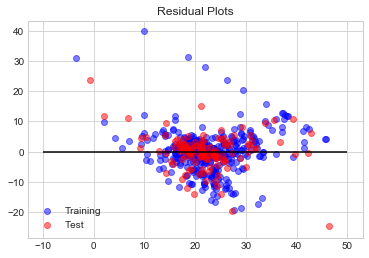

In [59]:
#Residual analysis
#redidual = observed value - predicted value
# Scatter plot the training data
train = plt.scatter(pred_train,(Y_train-pred_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(Y_test-pred_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

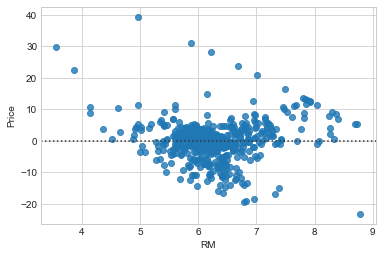

In [60]:
# Residual plot of all the dataset using seaborn
sns.residplot('RM', 'Price', data = boston_df)